# **MLOps - Grupo 3**
# **Taller 1**

*   Abel Albuez Sanchez
*   Omar Gaston Chalas
*   Silvio Mauricio Morales

*The Palmer penguins dataset*

**Notebook (1/3) **Random Forest** **




In [47]:
pip install palmerpenguins

In [48]:
from palmerpenguins import load_penguins
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

In [49]:
df = load_penguins()
print(df.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007  


In [50]:
print(df.columns)

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')


In [51]:
exclude = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

for col in df.columns:
    if col not in exclude:
        print(f"{col}: {df[col].unique()}")

species: ['Adelie' 'Gentoo' 'Chinstrap']
island: ['Torgersen' 'Biscoe' 'Dream']
sex: ['male' 'female' nan]
year: [2007 2008 2009]


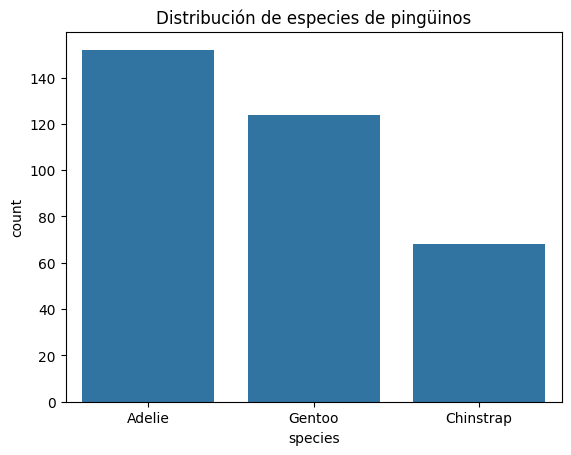

In [52]:
sns.countplot(data=df, x='species')
plt.title('Distribución de especies de pingüinos')
plt.show()

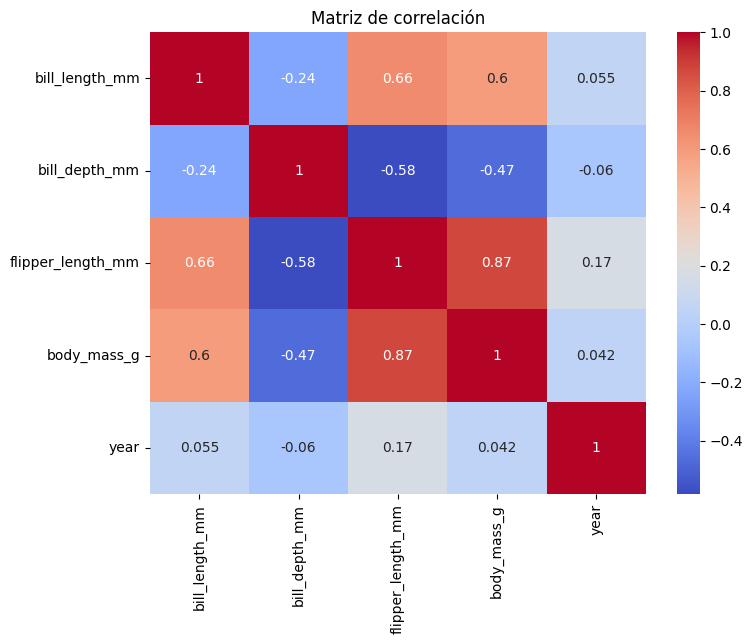

In [53]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

In [54]:
# Hacemos una validación de los valores nulos
print(df.isnull().sum())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64


In [55]:
# Eliminamos los nulos
df = df.dropna()

In [56]:
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'island', 'sex']
target = 'species'

In [57]:
# Codificamos las variables categoricas para poderlas usar con Random Forest. Especificamente 'island' y 'sex'.
df_encoded = pd.get_dummies(df[features], drop_first=True)
X = df_encoded
y = df[target]

In [58]:
print(X.shape, y.shape)

(333, 7) (333,)


In [59]:
# Dividimos el dataset en 80/20.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [60]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [61]:
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Matriz de confusión:
 [[29  0  0]
 [ 0 14  0]
 [ 0  0 24]]

Reporte de clasificación:
               precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [62]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [63]:
# Guardamos el modelo y sus pesos para el siguiente paso
joblib.dump(rf, 'Palmer_penguins_Random_Forest.pkl')

['Palmer_penguins_Random_Forest.pkl']